El Leave-One-Out Cross-Validation (LOOCV) es una técnica especial de validación cruzada que se utiliza para evaluar el rendimiento de un modelo de machine learning. Es similar a la validación cruzada estándar, pero tiene una característica muy particular: en cada iteración del proceso de validación, se utiliza una sola muestra como conjunto de prueba y el resto de los datos se usan para entrenar el modelo.

Funcionamiento de LOOCV:

División de los datos:
Dado un conjunto de datos con N muestras, LOOCV crea N particiones o iteraciones.
En cada iteración, se deja una sola muestra fuera (de ahí el nombre "leave one out"), que se utilizará como conjunto de prueba.
El modelo se entrena en las N-1 muestras restantes.

Repetición del proceso:
El proceso se repite N veces, dejando una muestra diferente fuera en cada iteración. En cada una de estas iteraciones, se entrena el modelo con N-1 muestras y se evalúa en la muestra que quedó fuera.

Promedio de resultados:
Al final del proceso, se promedian los resultados de todas las N iteraciones para obtener una métrica de rendimiento general del modelo (como el error cuadrático medio, la precisión, etc.).

¿Cuándo usar LOOCV?
* Conjuntos de datos pequeños: LOOCV es especialmente útil cuando tienes un conjunto de datos pequeño y quieres aprovechar al máximo cada muestra para entrenamiento y prueba.

* Modelos sensibles a pequeñas variaciones: Si quieres una evaluación muy detallada del rendimiento del modelo, LOOCV puede ser una buena opción, ya que prueba el modelo en cada muestra individualmente.

In [1]:
# Importar funciones y clases necesarias para el análisis
from numpy import mean  # Importa la función mean de NumPy para calcular el promedio de un array
from numpy import std  # Importa la función std de NumPy para calcular la desviación estándar de un array
from numpy import absolute  # Importa la función absolute de NumPy para obtener los valores absolutos de un array
from pandas import read_csv  # Importa la función read_csv de pandas para cargar datos desde un archivo CSV
from sklearn.model_selection import LeaveOneOut  # Importa la clase LeaveOneOut para realizar validación cruzada Leave-One-Out
from sklearn.model_selection import cross_val_score  # Importa la función cross_val_score para calcular las puntuaciones en la validación cruzada
from sklearn.ensemble import RandomForestRegressor  # Importa el modelo de regresión de bosques aleatorios de scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor 

In [2]:
'''
from sklearn.linear_model import LinearRegression  # Regresión Lineal
from sklearn.tree import DecisionTreeRegressor  # Árbol de Decisión para Regresión
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting para Regresión
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.neighbors import KNeighborsRegressor  # Vecinos Más Cercanos para Regresión

# Crear instancias de los modelos
linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor()
gradient_boosting = GradientBoostingRegressor()
svr = SVR()
knn = KNeighborsRegressor()
'''

'\nfrom sklearn.linear_model import LinearRegression  # Regresión Lineal\nfrom sklearn.tree import DecisionTreeRegressor  # Árbol de Decisión para Regresión\nfrom sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting para Regresión\nfrom sklearn.svm import SVR  # Support Vector Regressor\nfrom sklearn.neighbors import KNeighborsRegressor  # Vecinos Más Cercanos para Regresión\n\n# Crear instancias de los modelos\nlinear_model = LinearRegression()\ndecision_tree = DecisionTreeRegressor()\ngradient_boosting = GradientBoostingRegressor()\nsvr = SVR()\nknn = KNeighborsRegressor()\n'

In [3]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'  # URL del conjunto de datos
dataframe = read_csv(url, header=None)  # Cargar el archivo CSV en un DataFrame de pandas sin nombres de columnas
data = dataframe.values  # Convertir el DataFrame en un array de NumPy para procesamiento

In [4]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Separar el conjunto de datos en entradas (X) y salidas (y)
X, y = data[:, :-1], data[:, -1]  # X contiene todas las columnas excepto la última, y contiene solo la última columna
print(X.shape, y.shape)  # Imprimir las dimensiones de las entradas y salidas

(506, 13) (506,)


X, y = data[:, :-1], data[:, -1]:

X: Selecciona todas las filas del array data y todas las columnas excepto la última (:-1). Esto contiene las características o variables independientes (entradas).
y: Selecciona todas las filas del array data y solo la última columna (-1). Esta columna representa la variable objetivo o dependiente (salidas).
El conjunto de datos de Boston contiene diversas características de viviendas (en X) y el precio medio de la vivienda (en y).

In [6]:
cv = LeaveOneOut()

In [35]:
# Crear el modelo de regresión utilizando Random Forest
model = RandomForestRegressor(random_state=1)
#model = RandomForestRegressor(random_state=1)
#model = LinearRegression # Regresión Lineal #NameError: name 'LinearRegression' is not defined
#model = DecisionTreeRegressor(random_state=1)  # Árbol de Decisión para Regresión #NameError: name 'DecisionTreeRegressor' is not defined
#model = GradientBoostingRegressor(random_state=1)  # Gradient Boosting para Regresión #NameError: name 'GradientBoostingRegressor' is not defined
#model = SVR(random_state=1)  # Support Vector Regressor #NameError: name 'SVR' is not defined
#model = KNeighborsRegressor()  # Vecinos Más Cercanos para Regresión

In [14]:
# Evaluar el modelo utilizando Leave-One-Out Cross-Validation (LOOCV)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

cross_val_score():

Esta función realiza la validación cruzada utilizando el modelo y los datos proporcionados. En este caso, se utiliza el procedimiento LOOCV definido anteriormente con LeaveOneOut().
Se entrena y evalúa el modelo en cada iteración, donde una muestra se utiliza como conjunto de prueba y el resto como conjunto de entrenamiento.
Parámetros:

model: El modelo que será evaluado, en este caso, el RandomForestRegressor.
X: El conjunto de características o variables independientes.
y: La variable objetivo que se quiere predecir (en este caso, el precio de las viviendas).
scoring='neg_mean_absolute_error': Especifica la métrica de evaluación. En este caso, se utiliza el error absoluto medio negativo (MAE negativo). El MAE mide el error promedio entre las predicciones y los valores reales. Dado que scikit-learn maximiza las métricas por defecto, se devuelve el valor negativo del MAE para ajustarse a este criterio.
cv=cv: Utiliza el procedimiento LOOCV definido anteriormente para dividir los datos.
n_jobs=-1: Esto indica que se utilizarán todos los núcleos de CPU disponibles para acelerar el proceso de validación cruzada (paralelización).
scores:

Almacena un array con los scores (puntuaciones) obtenidos en cada iteración del procedimiento de validación cruzada (en este caso, uno por cada muestra, ya que se usa LOOCV).
Los valores en scores serán los MAE negativos de cada iteración.

métricas más comunes para regresión:
* neg_mean_squared_error: Penaliza más los errores grandes.
* neg_root_mean_squared_error: Es el MSE interpretado en las mismas unidades que la variable objetivo.
* neg_mean_absolute_error: Penaliza todos los errores por igual.
* r2: Indica qué tan bien se ajusta el modelo a los datos (1 es el ajuste perfecto).
* explained_variance: Proporción de la varianza explicada por el modelo.

In [16]:
#La función absolute() proviene de NumPy y se utiliza para calcular el valor absoluto de cada elemento en un array.
scores = absolute(scores)

In [17]:
len(scores)

506

In [18]:
print('c-G.G [Gabriel Guzmán] MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

c-G.G [Gabriel Guzmán] MAE: 10.229 (30.372)


* 2.182:

Este es el MAE (Error Absoluto Medio) promedio.
Significa que, en promedio, el modelo se está equivocando en aproximadamente 2.182 unidades en sus predicciones en comparación con los valores reales.
Cuanto más bajo sea este valor, mejor es el rendimiento del modelo, ya que indica un menor error en las predicciones.


* 2.338:

Este valor es la desviación estándar del MAE.
La desviación estándar mide la dispersión de los errores a lo largo de los diferentes folds de validación cruzada.
Una desviación estándar de 2.338 indica que los errores del modelo varían en un rango de aproximadamente 2.338 unidades alrededor del promedio de 2.182.
Si este valor fuera más pequeño, indicaría que los errores están más consistentes entre las diferentes particiones de los datos. Un valor mayor sugiere que hay más variación en los errores.

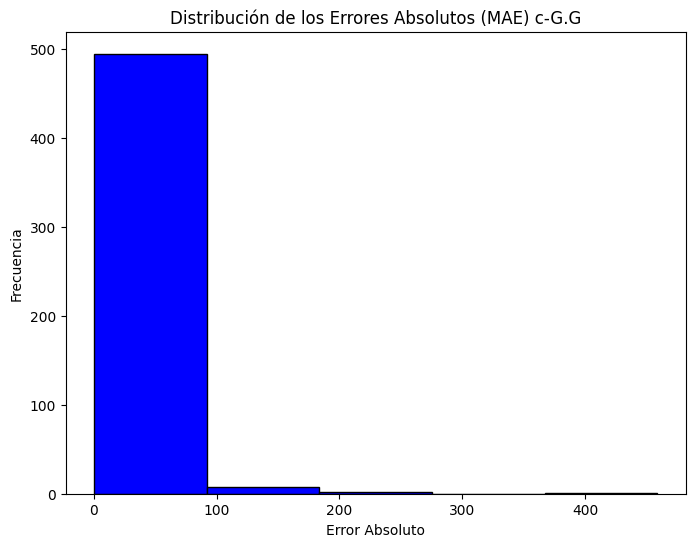

In [19]:
# Crear el histograma de los valores en scores
plt.figure(figsize=(8,6))
plt.hist(scores, bins=5, color='blue', edgecolor='black')
plt.title('Distribución de los Errores Absolutos (MAE) c-G.G')
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

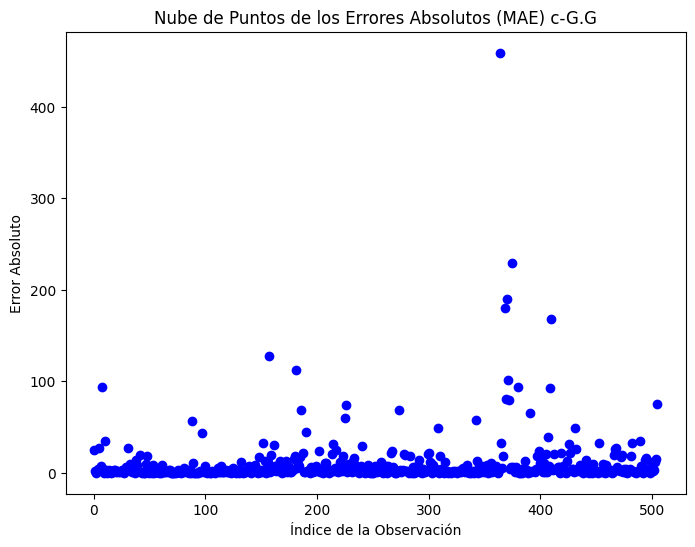

In [20]:
# Crear una gráfica de dispersión (nube de puntos)
plt.figure(figsize=(8,6))
plt.scatter(range(len(scores)), scores, color='blue')
plt.title('Nube de Puntos de los Errores Absolutos (MAE) c-G.G')
plt.xlabel('Índice de la Observación')
plt.ylabel('Error Absoluto')

# Mostrar la gráfica
plt.show()